# Ensemble Model


In [ ]:
# Import data
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# Read files 
train = pd.read_csv('/content/drive/MyDrive/Final Project/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Final Project/sign_mnist_test.csv')

In [ ]:
# Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [ ]:
# Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  I


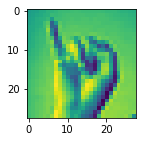

In [ ]:
# Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28))) 
print("Label for the image is: ", class_names[int(train_data[i,0])])

In [ ]:
img = train_data[0]
img.shape

(785,)

Text(0.5, 1.0, 'Label')

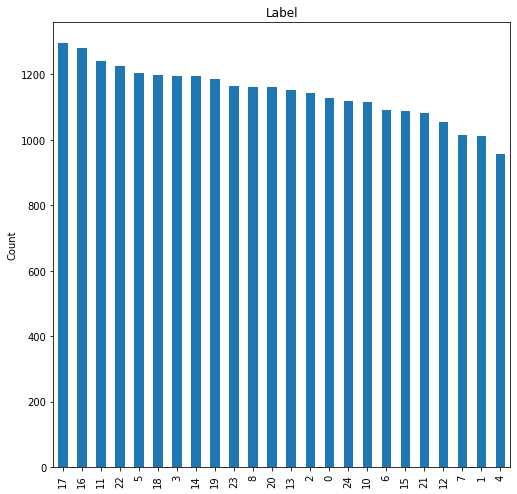

In [ ]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [ ]:
# Normalize 
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [ ]:
# Convert y to categorical 
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [ ]:
# Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28,28))

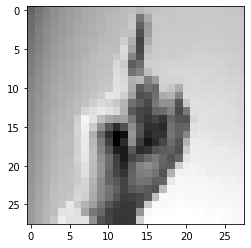

In [ ]:
test_image = X_train[0]
test_image.shape

plt.imshow(test_image, cmap='gray')

In [ ]:
#Model 1

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(25, activation = 'softmax'))

model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
#Train model1
history1 = model1.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))
model1.save('saved_models/model1.hdf5')

Epoch 1/10
215/215 [==============================] - 16s 8ms/step - loss: 2.5740 - acc: 0.2107 - val_loss: 1.4776 - val_acc: 0.5881
Epoch 2/10
215/215 [==============================] - 2s 7ms/step - loss: 1.0880 - acc: 0.6432 - val_loss: 0.7014 - val_acc: 0.7815
Epoch 3/10
215/215 [==============================] - 2s 7ms/step - loss: 0.6065 - acc: 0.7952 - val_loss: 0.4797 - val_acc: 0.8356
Epoch 4/10
215/215 [==============================] - 2s 7ms/step - loss: 0.4034 - acc: 0.8637 - val_loss: 0.3906 - val_acc: 0.8554
Epoch 5/10
215/215 [==============================] - 2s 7ms/step - loss: 0.2775 - acc: 0.9062 - val_loss: 0.2981 - val_acc: 0.9066
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2007 - acc: 0.9332 - val_loss: 0.2522 - val_acc: 0.9175
Epoch 7/10
215/215 [==============================] - 2s 7ms/step - loss: 0.1554 - acc: 0.9500 - val_loss: 0.2567 - val_acc: 0.9239
Epoch 8/10
215/215 [==============================] - 2s 7ms/step - loss: 0

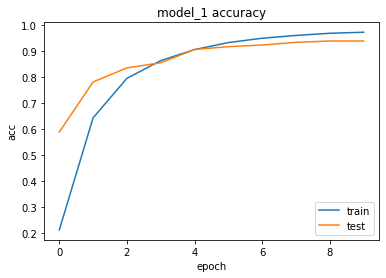

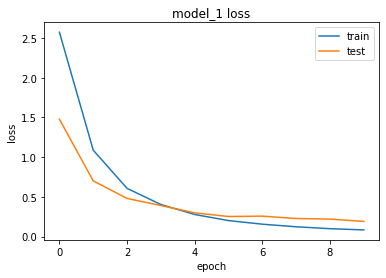

In [ ]:
# Summarize the accuracy of model 1

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model_1 accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc ='lower right')
plt.show()

# Summarize the loss of model 1

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
#Model2

model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))

model2.add(Dense(25, activation = 'softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
#Train model2
history2 = model2.fit(X_train, y_train_cat, batch_size = 128, epochs = 15, verbose = 1, validation_data = (X_test, y_test_cat))
model2.save('saved_models/model2.hdf5')

Epoch 1/15
215/215 [==============================] - 3s 9ms/step - loss: 2.3292 - acc: 0.2742 - val_loss: 1.4054 - val_acc: 0.5598
Epoch 2/15
215/215 [==============================] - 2s 8ms/step - loss: 0.9098 - acc: 0.6948 - val_loss: 0.6984 - val_acc: 0.7683
Epoch 3/15
215/215 [==============================] - 2s 8ms/step - loss: 0.4564 - acc: 0.8431 - val_loss: 0.5162 - val_acc: 0.8155
Epoch 4/15
215/215 [==============================] - 2s 10ms/step - loss: 0.2671 - acc: 0.9106 - val_loss: 0.3881 - val_acc: 0.8723
Epoch 5/15
215/215 [==============================] - 2s 7ms/step - loss: 0.1641 - acc: 0.9466 - val_loss: 0.3656 - val_acc: 0.8935
Epoch 6/15
215/215 [==============================] - 2s 8ms/step - loss: 0.1041 - acc: 0.9683 - val_loss: 0.3365 - val_acc: 0.8949
Epoch 7/15
215/215 [==============================] - 2s 7ms/step - loss: 0.0824 - acc: 0.9748 - val_loss: 0.3539 - val_acc: 0.8996
Epoch 8/15
215/215 [==============================] - 2s 7ms/step - loss: 0

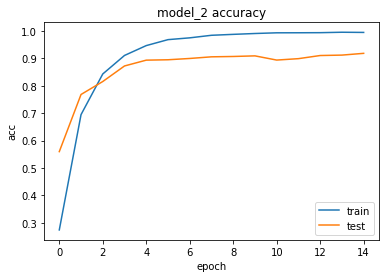

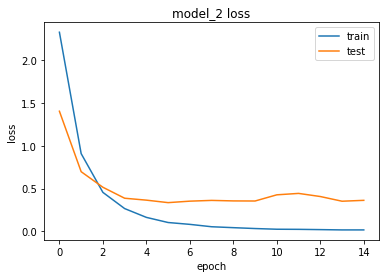

In [ ]:
# Summarize the accuracy of model 2

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model_2 accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc ='lower right')
plt.show()

# Summarize the loss of model 2

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
#Model 3

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(25, activation = 'softmax'))
model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

In [ ]:
#Train model3
history3 = model3.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))
model3.save('saved_models/model3.hdf5')

Epoch 1/10
215/215 [==============================] - 2s 7ms/step - loss: 1.9070 - acc: 0.4474 - val_loss: 0.9941 - val_acc: 0.7079
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 0.5400 - acc: 0.8372 - val_loss: 0.5465 - val_acc: 0.8208
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2490 - acc: 0.9264 - val_loss: 0.4198 - val_acc: 0.8652
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1326 - acc: 0.9644 - val_loss: 0.3455 - val_acc: 0.9045
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0800 - acc: 0.9804 - val_loss: 0.3108 - val_acc: 0.9144
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0533 - acc: 0.9877 - val_loss: 0.3071 - val_acc: 0.9138
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0383 - acc: 0.9923 - val_loss: 0.2867 - val_acc: 0.9155
Epoch 8/10
215/215 [==============================] - 1s 6ms/step - loss: 0.

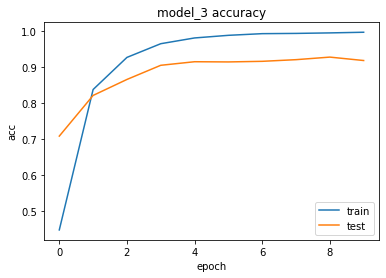

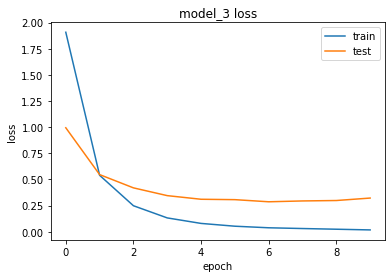

In [ ]:
# Summarize the accuracy of model 3

plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model_3 accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc ='lower right')
plt.show()

# Summarize the loss of model 3

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# Sum Ensemble

from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('saved_models/model1.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')

models = [model1, model2, model3]

preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# Argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(X_test), axis=1)
prediction2 = np.argmax(model2.predict(X_test), axis=1)
prediction3 = np.argmax(model3.predict(X_test), axis=1)

accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)


Accuracy Score for model1 =  0.9393474623535973
Accuracy Score for model2 =  0.9182933630786392
Accuracy Score for model3 =  0.9177356385945343
Accuracy Score for average ensemble =  0.9577523703290575


In [ ]:
# Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

# Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.9393474623535973
Accuracy Score for model2 =  0.9182933630786392
Accuracy Score for model3 =  0.9177356385945343
Accuracy Score for average ensemble =  0.9577523703290575
Accuracy Score for weighted average ensemble =  0.9564974902398216


In [ ]:
# Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(X_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(y_test, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w2=", max_acc_row[2], " and w3=", max_acc_row[3])         

Max accuracy of  0.3  obained with w1= 0.1  w2= 0.2  and w3= 96.27718906860011


In [ ]:
# Explore metrics for the ideal weighted ensemble model. 

models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2] 

Predicted Label:  A
True Label:  A


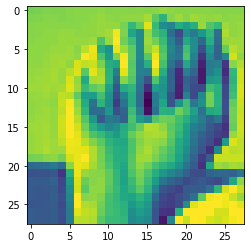

In [ ]:
# Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)



i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns

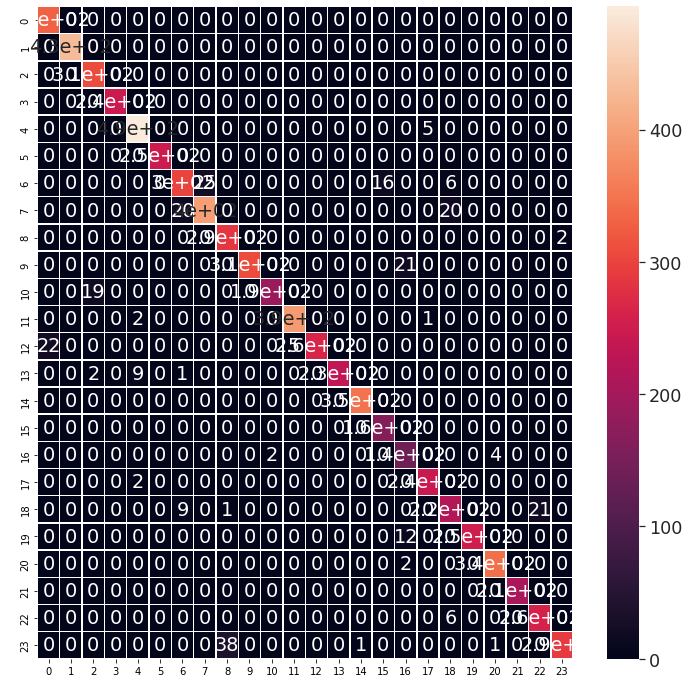

In [ ]:
# Print confusion matrix
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x7f84793a9590>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E'),
  Text(0, 0, 'F'),
  Text(0, 0, 'G'),
  Text(0, 0, 'H'),
  Text(0, 0, 'I'),
  Text(0, 0, 'J'),
  Text(0, 0, 'K'),
  Text(0, 0, 'L'),
  Text(0, 0, 'M'),
  Text(0, 0, 'N'),
  Text(0, 0, 'O'),
  Text(0, 0, 'P'),
  Text(0, 0, 'Q'),
  Text(0, 0, 'R'),
  Text(0, 0, 'S'),
  Text(0, 0, 'T'),
  Text(0, 0, 'U'),
  Text(0, 0, 'V'),
  Text(0, 0, 'W'),
  Text(0, 0, 'X')])

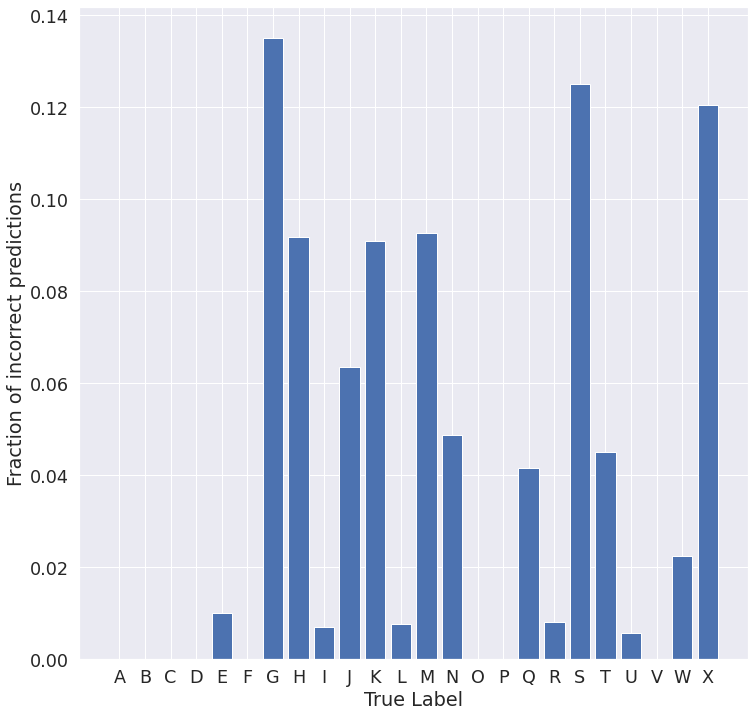

In [ ]:
# Plot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 

In [ ]:
# Load Model

model = keras.models.load_model('/content/drive/MyDrive/ML_in_practice/model1.hdf5')
model.summary()

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

# Capture from webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
file = r'/content/drive/MyDrive/ML_in_practice/img012.jpg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE) 

plt.imshow(test_image, cmap='gray')

plt.imshow(test_image) 

In [ ]:
img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
# img_resized = cv2.bitwise_not(img_resized)

plt.imshow(img_resized, cmap="gray")

img_resized.shape




img_resized_1 = (np.expand_dims(img_resized, 0))
print('Class Name:')

class_names[np.argmax(model.predict(img_resized_1)[0])]